In [6]:
from functions import *
from parameters_GaAs_QW import *
import pickle
import matplotlib.pyplot as plt

In [2]:
power = 30
delays = np.array([-3000, -2500, -2000, -1500, -1333, -1166, -1000, -833, -666, -500, -333, -166, 0, 166, 333, 500, 666, 833, 1000, 1500, 2000, 2500, 3000, 3500, 4000],dtype = float)
#delays = [float(i) for i in range(-3000, 4500, 500)]
absorptions = []
#True_gamma_inter=0.01
for dt in delays:
    with open(r"/home/olivervoigt2/new_absorption_18.11./pump_probe/results/general/dt={}_E_pump={}_sqrt_power_conversion_factor=0.15_Qdim=700_Qmax=1.5_quadratic_grid_intra_rel=False_absorption_probe.pickle".format(dt,power), 'rb') as input_file:
        absorptions.append(pickle.load(input_file))


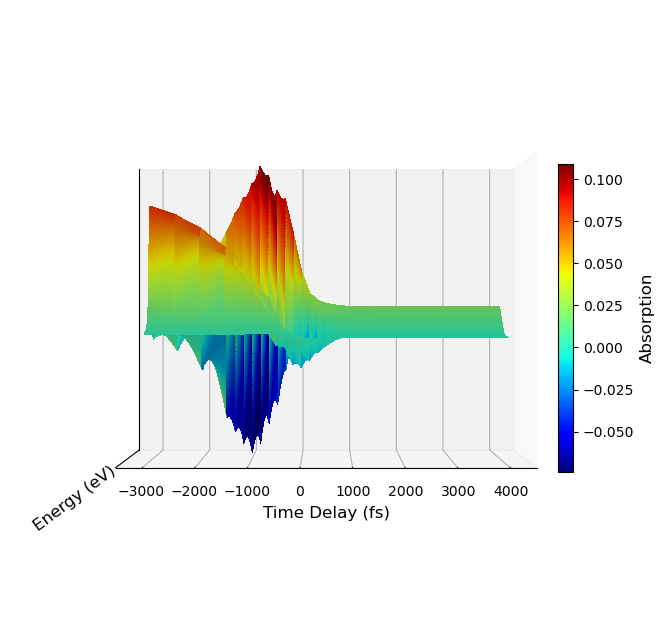

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Convert the data to a numpy array for easier manipulation
absorptions = np.array(absorptions)  # Shape should be (num_delays, num_energies)

# Define energy range based on the length of one absorption sample (assuming they are consistent)
num_energies = absorptions.shape[1]
energy = np.linspace(1, 5, num_energies)  # Replace with your actual energy range if available

# Create a meshgrid for plotting, with time delay on x-axis and energy on y-axis
X, Y = np.meshgrid(delays, energy)  # Note the swap: X=delays, Y=energy
Z = absorptions.T  # Transpose to match the meshgrid orientation

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Normalize Z data for color scaling
norm = plt.Normalize(Z.min(), Z.max())

# Plot the surface with smooth coloring and gridlines on top
cmap = cm.jet  # Use 'jet' colormap to match the color gradient in the example
surf = ax.plot_surface(
    X, Y, Z,
    facecolors=cmap(norm(Z)),  # Smooth color gradient
    edgecolor='k',  # Black gridlines on top
    rstride=1, cstride=1,  # Control gridline density
    linewidth=0.0,  # Thin gridlines
    antialiased=False  # Prevents any unintended aliasing effects
)

# Add a color bar
colorbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, shrink=0.5, aspect=20, pad=-0.03 )
colorbar.set_label("Absorption", fontsize=12)
#colorbar.set_ticks(np.linspace(Z.min(), Z.max(), 6))  # Adjust tick range if necessary
ax.set_zticks([])
# Label axes with similar styling
ax.set_xlabel("Time Delay (fs)", fontsize=12, labelpad=10)
ax.set_ylabel("Energy (eV)", fontsize=12, labelpad=10)
#ax.set_zlabel("Absorption", fontsize=12, labelpad=10)

# Set a title similar to the example plot
#ax.set_title("15 µW cocircular", loc='left', fontsize=14)

# Customize tick font size
ax.tick_params(axis='both', which='major', labelsize=10)

# Rotate the plot to match the example's viewing angle
ax.view_init(elev=20, azim=-20)  # Adjust elevation and azimuth angle to match the orientation
plt.savefig(r"results/general/3d_absorption_{}uW.pdf".format(power),bbox_inches = 'tight')

ax.view_init(elev=90, azim=0)  # Adjust elevation and azimuth angle to generate a topview
colorbar.remove()
colorbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, shrink=0.5, aspect=20, pad=-0.1 )
colorbar.set_label("Absorption", fontsize=12)
#ax.set_zlabel('')
plt.savefig(r"results/general/3d_absorption_topview{}uW.pdf".format(power),bbox_inches = 'tight')

ax.view_init(elev=0, azim=-0)  # Adjust elevation and azimuth angle to generate a sideview
ax.set_xticks([])
plt.savefig(r"results/general/3d_absorption_energyview{}uW.pdf".format(power),bbox_inches = 'tight')

ax.view_init(elev=0, azim=-90)  # Adjust elevation and azimuth angle to generate the other sideview
ax.set_yticks([])
ax.set_xticks([i for i in range(-3000, 4500, 1000)])
#plt.savefig(r"results/general/3d_absorption_timeview{}uW.pdf".format(power),bbox_inches = 'tight')
plt.show()


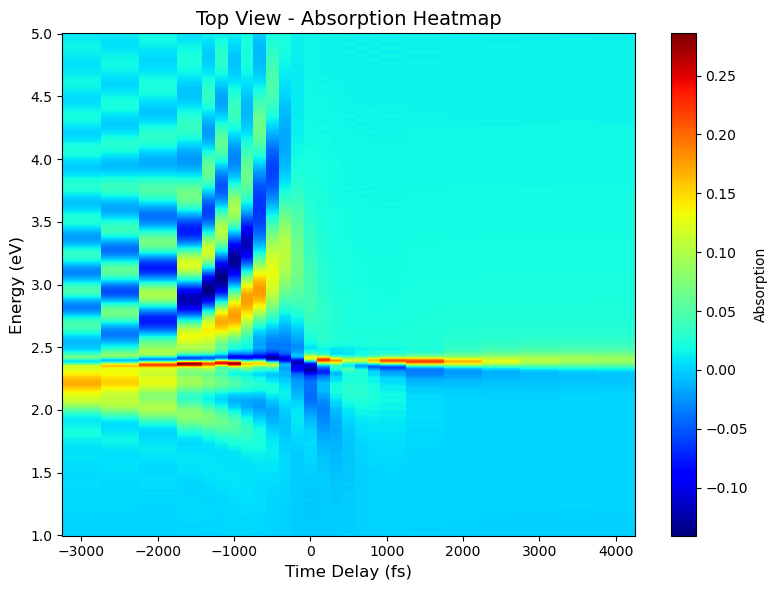

In [4]:
# 1. Top View Plot (Absorption vs Time Delay and Energy)
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap
c = ax.pcolormesh(delays, energy, Z, shading='auto', cmap='jet')

# Add colorbar
fig.colorbar(c, ax=ax, label='Absorption')

# Label axes
ax.set_xlabel('Time Delay (fs)', fontsize=12)
ax.set_ylabel('Energy (eV)', fontsize=12)
ax.set_title('Top View - Absorption Heatmap', fontsize=14)

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig(r"results/general/absorption_topview2_{}uW.pdf".format(power), bbox_inches='tight')

Filtered Energies: [1.47996594 1.47993134 1.47989674 1.47986203 1.47982742 1.47979282
 1.47975823 1.47972353 1.47968892 1.47965433 1.47961964 1.47958505
 1.47955045 1.47951576 1.47948118 1.47944658 1.4794119  1.47937732
 1.47934274 1.47930815 1.47927348 1.47923891 1.47920434 1.47916965
 1.47913508 1.47910052 1.47906596 1.47903127 1.47899671 1.47896216
 1.4789276  1.47889292 1.47885837 1.47882382 1.47878917 1.4787546
 1.47872006 1.47868551 1.47865086 1.4786163  1.47858177 1.47854723
 1.47851257 1.47847803 1.4784435  1.47840897 1.47837432 1.47833979
 1.47830526 1.47827074 1.47823621 1.47820157 1.47816705 1.47813253
 1.47809801 1.47806338 1.47802886 1.47799435 1.47795984 1.47792531
 1.4778907  1.4778562  1.47782169 1.47778717 1.47775257 1.47771807
 1.47768355 1.47764906 1.47761456 1.47757996 1.47754546 1.47751097
 1.47747648 1.47744199 1.47740738 1.4773729  1.47733842 1.47730394
 1.47726946 1.47723497 1.47720039 1.47716592 1.47713144 1.47709696
 1.47706249 1.47702802 1.47699345 1.47695897

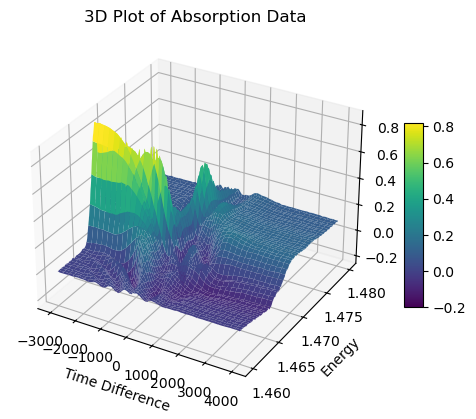

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def read_dat_file(filename):
    """
    Reads a .dat file where:
    - The first entry of each row is the energy.
    - The following entries are the absorption values for corresponding time differences.
    Handles NaN values gracefully.

    Returns:
    - Energies (1D NumPy array)
    - Time differences (1D NumPy array)
    - Absorption values (2D NumPy array)
    """
    with open(filename, 'r', encoding='utf-8-sig') as f:
        # Read the first line to get the time differences (column headers)
        header = f.readline().strip().split()
        time_differences = np.array([float(t) for t in header])

        # Read the remaining data into a NumPy array
        data = np.genfromtxt(f, missing_values='', filling_values=np.nan)

    # Split the data into energies and absorption values
    energies = data[:, 0]  # First column: Energies
    absorption_values = data[:, 1:]  # Remaining columns: Absorption values

    return energies, time_differences, absorption_values

def filter_data(energies, time_differences, absorption_values, energy_min, energy_max, time_min, time_max):
    """
    Filters the data to include only entries corresponding to energies
    between energy_min and energy_max, and time differences between time_min and time_max.

    Returns:
    - Filtered energies, time differences, and absorption values.
    """
    # Filter energies
    energy_mask = (energies >= energy_min) & (energies <= energy_max)
    filtered_energies = energies[energy_mask]
    filtered_absorption_values = absorption_values[energy_mask, :]

    # Filter time differences
    time_mask = (time_differences >= time_min) & (time_differences <= time_max)
    filtered_time_differences = time_differences[time_mask]
    filtered_absorption_values = filtered_absorption_values[:, time_mask]

    return filtered_energies, filtered_time_differences, filtered_absorption_values

def plot_3d_data(energies, time_differences, absorption_values):
    """
    Creates a 3D plot of the data.
    - X-axis: Time differences
    - Y-axis: Energies
    - Z-axis: Absorption values
    """
    X, Y = np.meshgrid(time_differences, energies)
    Z = absorption_values

    # Create the 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the surface
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

    # Add labels and title
    ax.set_xlabel('Time Difference')
    ax.set_ylabel('Energy')
    ax.set_zlabel('Absorption')
    ax.set_title('3D Plot of Absorption Data')

    # Add a color bar
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

    plt.show()

# Example usage
power = 150
filename = r"data_gießen/{}uW kozirkular.dat".format(power)  # Replace with your .dat file path
energies, time_differences, absorption_values = read_dat_file(filename)

# Filter data for energies between 1.460 and 1.480, and time differences between -3000 and 4000
energy_min = 1.460
energy_max = 1.480
time_min = -3000
time_max = 4000
filtered_energies, filtered_time_differences, filtered_absorption_values = filter_data(
    energies, time_differences, absorption_values, energy_min, energy_max, time_min, time_max
)

# Print the filtered data for verification
print("Filtered Energies:", filtered_energies)
print("Filtered Time Differences:", filtered_time_differences)
print("Filtered Absorption Values:\n", filtered_absorption_values)

# Plot the filtered data
plot_3d_data(filtered_energies, filtered_time_differences, filtered_absorption_values)


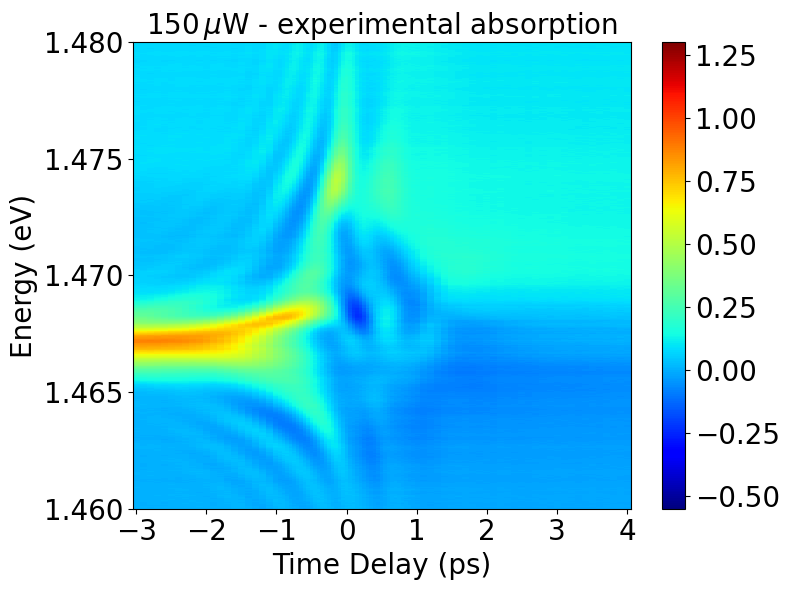

In [12]:
# 1. Top View Plot (Absorption vs Time Delay and Energy)
fig, ax = plt.subplots(figsize=(8, 6))
# Create a heatmap
c = ax.pcolormesh(filtered_time_differences/1000, filtered_energies, filtered_absorption_values, shading='auto', cmap='jet', vmin = -0.55, vmax = 1.3)

# Add colorbar
cbar = fig.colorbar(c, ax=ax)
cbar.ax.tick_params(labelsize=20)
# Label axes
ax.set_xlabel('Time Delay (ps)', fontsize=20)
ax.set_ylabel('Energy (eV)', fontsize=20)
plt.xticks(fontsize = 20)
plt.yticks([1.460, 1.465, 1.470, 1.475, 1.480],fontsize = 20)
ax.set_title(r'{}$\,\mu$W - experimental absorption'.format(power), fontsize=20)

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig(r"results/general/absorption_experiment_{}uW.pdf".format(power), bbox_inches='tight')

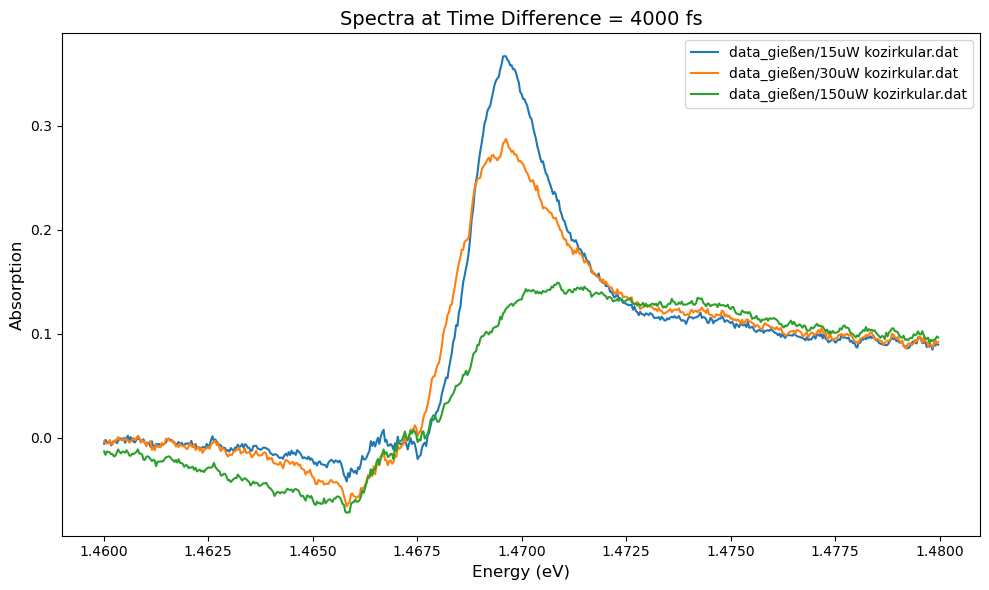

In [59]:
import numpy as np
import matplotlib.pyplot as plt
file_path = '2022-05-23 26795 Linabs and Pump.txt'
start = 350
stop = 930

# Load the data from the .txt file into a NumPy array
data = np.loadtxt(file_path)

# If you want to access individual columns, you can slice the array:
energy = data[:, 0][start:stop]
omegas = energy/hbar
absorption = data[:, 1][start:stop]
pulse = data[:, 2][start:stop]

def read_dat_file(filename):
    """
    Reads a .dat file where:
    - The first entry of each row is the energy.
    - The following entries are the absorption values for corresponding time differences.
    Handles NaN values gracefully.

    Returns:
    - Energies (1D NumPy array)
    - Time differences (1D NumPy array)
    - Absorption values (2D NumPy array)
    """
    with open(filename, 'r', encoding='utf-8-sig') as f:
        # Read the first line to get the time differences (column headers)
        header = f.readline().strip().split()
        time_differences = np.array([float(t) for t in header])

        # Read the remaining data into a NumPy array
        data = np.genfromtxt(f, missing_values='', filling_values=np.nan)

    # Split the data into energies and absorption values
    energies = data[:, 0]  # First column: Energies
    absorption_values = data[:, 1:]  # Remaining columns: Absorption values

    return energies, time_differences, absorption_values

def extract_spectrum_at_time_difference(filename, target_time, energy_min, energy_max):
    """
    Extracts the spectrum at a specific time difference from a .dat file,
    limited to a specific energy range.

    Returns:
    - Filtered energies (1D NumPy array)
    - Spectrum (1D NumPy array)
    """
    energies, time_differences, absorption_values = read_dat_file(filename)

    # Find the index of the target time difference
    time_idx = np.argmin(np.abs(time_differences - target_time))
    spectrum = absorption_values[:, time_idx]

    # Filter by energy range
    energy_mask = (energies >= energy_min) & (energies <= energy_max)
    filtered_energies = energies[energy_mask]
    filtered_spectrum = spectrum[energy_mask]

    return filtered_energies, filtered_spectrum

def plot_spectra(file_list, target_time, energy_min, energy_max):
    """
    Plots spectra at a specific time difference from multiple files,
    limited to a specific energy range.
    """
    plt.figure(figsize=(10, 6))

    for filename in file_list:
        # Extract the spectrum
        filtered_energies, filtered_spectrum = extract_spectrum_at_time_difference(
            filename, target_time, energy_min, energy_max
        )
        plt.plot(filtered_energies, filtered_spectrum, label=filename)

    # Customize the plot
    plt.xlabel('Energy (eV)', fontsize=12)
    plt.ylabel('Absorption', fontsize=12)
    plt.title(f'Spectra at Time Difference = {target_time} fs', fontsize=14)
    plt.legend()
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage
file_list = [
    "data_gießen/15uW kozirkular.dat",  # Replace with your actual file paths
    "data_gießen/30uW kozirkular.dat",
    "data_gießen/150uW kozirkular.dat"
]
target_time = 4000  # Time difference to extract spectrum
energy_min = 1.460  # Minimum energy
energy_max = 1.480  # Maximum energy
plot_spectra(file_list, target_time, energy_min, energy_max)

